**part 1 (ElectricCarData)**
- *Topic: Forecasting the price of electric cars*
- *Purpose: The purpose of this section is to familiarize with linear and polynomial regression and the method different ways to obtain the parameters of the algorithm.*

In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
from pandas.plotting import scatter_matrix
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import time


*Reading Data*

In [446]:
dataframe=pd.read_csv("ElectricCarData_Clean.csv")
df=dataframe[:]

*DataFrame Information*

In [447]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   98 non-null     float64
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 11.4+ KB


In [448]:
dataframe.select_dtypes(include=[np.number]).head()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940.0,5,55480
1,10.0,160,270,167,250.0,5,30000
2,4.7,210,400,181,620.0,5,56440
3,6.8,180,360,206,560.0,5,68040
4,9.5,145,170,168,190.0,4,32997


In [449]:
dataframe.select_dtypes(include="object").head()

,Brand,Model,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Tesla,Model 3 Long Range Dual Motor,Yes,AWD,Type 2 CCS,Sedan,D
1,Volkswagen,ID.3 Pure,Yes,RWD,Type 2 CCS,Hatchback,C
2,Polestar,2,Yes,AWD,Type 2 CCS,Liftback,D
3,BMW,iX3,Yes,RWD,Type 2 CCS,SUV,D
4,Honda,e,Yes,RWD,Type 2 CCS,Hatchback,B


*convert object based variable to categorical variable*

In [450]:
df["RapidCharge"]=df["RapidCharge"].astype('category')
df["PowerTrain"]=df["PowerTrain"].astype('category')
df["PlugType"]=df["PlugType"].astype('category')
df["BodyStyle"]=df["BodyStyle"].astype('category')
df["Segment"]=df["Segment"].astype('category')
df["PowerTrain"]=df["PowerTrain"].astype('category')
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Brand            103 non-null    object  
 1   Model            103 non-null    object  
 2   AccelSec         103 non-null    float64 
 3   TopSpeed_KmH     103 non-null    int64   
 4   Range_Km         103 non-null    int64   
 5   Efficiency_WhKm  103 non-null    int64   
 6   FastCharge_KmH   98 non-null     float64 
 7   RapidCharge      103 non-null    category
 8   PowerTrain       103 non-null    category
 9   PlugType         103 non-null    category
 10  BodyStyle        103 non-null    category
 11  Segment          103 non-null    category
 12  Seats            103 non-null    int64   
 13  PriceEuro        103 non-null    int64   
dtypes: category(5), float64(2), int64(5), object(2)
memory usage: 9.0+ KB


*Data Analysis*

In [451]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,456.734694,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,201.262897,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,275.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,560.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [452]:
df_numeric=df.select_dtypes(include=[np.number])
df_numeric.corr().to_csv("corr.csv",header=True)
df_numeric.corr()


,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.768397,-0.175335,-0.627174
TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.769719,0.126470,0.829057
Range_Km,-0.677062,0.746662,1.000000,0.313077,0.698120,0.300163,0.674844
Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.307342,0.301230,0.396705
FastCharge_KmH,-0.768397,0.769719,0.698120,0.307342,1.000000,0.096641,0.651613
Seats,-0.175335,0.126470,0.300163,0.301230,0.096641,1.000000,0.020920
PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.651613,0.020920,1.000000


<Axes: >

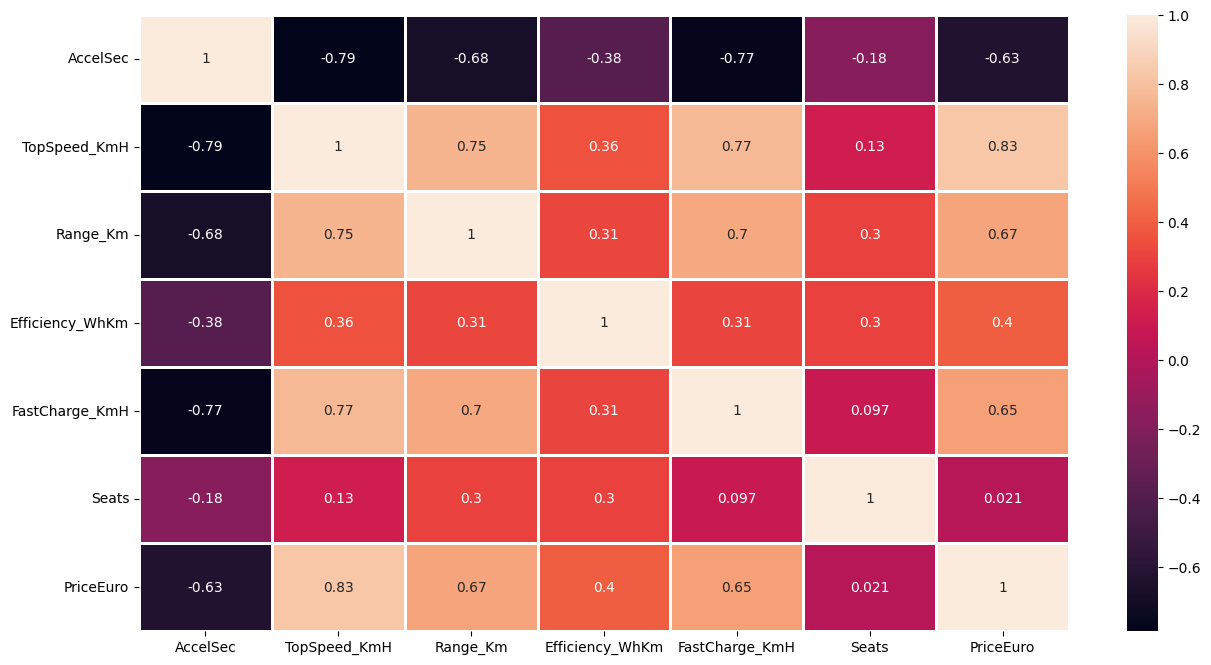

In [453]:
ax= plt.figure(figsize=(15,8))
sns.heatmap(df_numeric.corr(),linewidths=1,linecolor='white',annot=True)

In [454]:
corr_matrix=df_numeric.corr()
corr_matrix["AccelSec"].sort_values(ascending=False)

AccelSec           1.000000
Seats             -0.175335
Efficiency_WhKm   -0.382904
PriceEuro         -0.627174
Range_Km          -0.677062
FastCharge_KmH    -0.768397
TopSpeed_KmH      -0.786195
Name: AccelSec, dtype: float64

In [455]:
corr_matrix["TopSpeed_KmH"].sort_values(ascending=False) 

TopSpeed_KmH       1.000000
PriceEuro          0.829057
FastCharge_KmH     0.769719
Range_Km           0.746662
Efficiency_WhKm    0.355675
Seats              0.126470
AccelSec          -0.786195
Name: TopSpeed_KmH, dtype: float64

In [456]:
corr_matrix["PriceEuro"].sort_values(ascending=False)

PriceEuro          1.000000
TopSpeed_KmH       0.829057
Range_Km           0.674844
FastCharge_KmH     0.651613
Efficiency_WhKm    0.396705
Seats              0.020920
AccelSec          -0.627174
Name: PriceEuro, dtype: float64

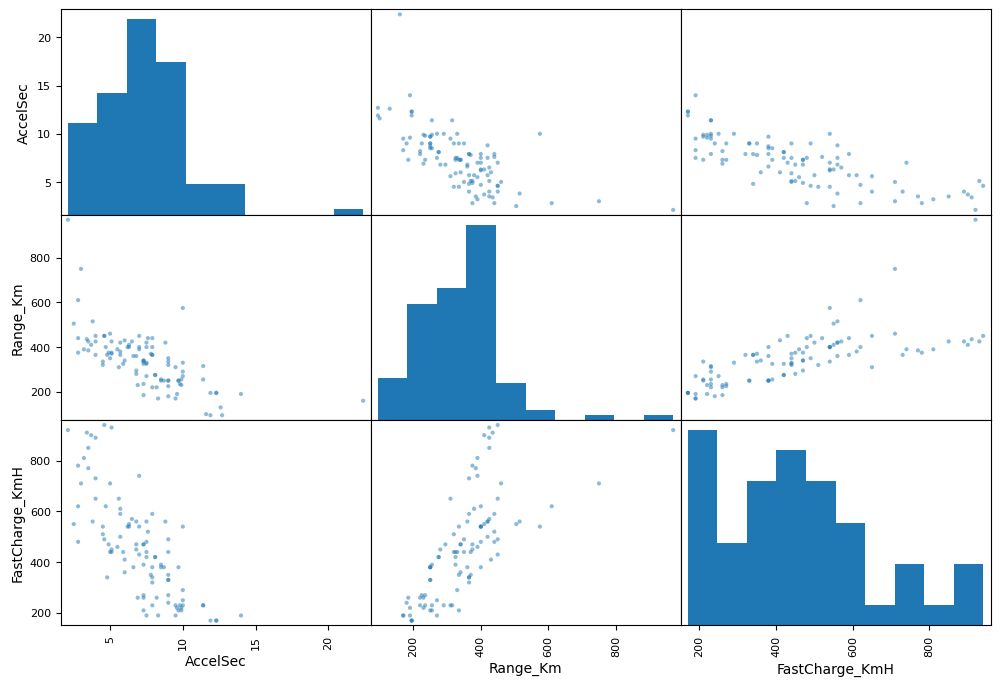

In [457]:
attributes = ["AccelSec", "Range_Km", "FastCharge_KmH"]
scatter_matrix(df_numeric[attributes], figsize=(12, 8))
plt.show()

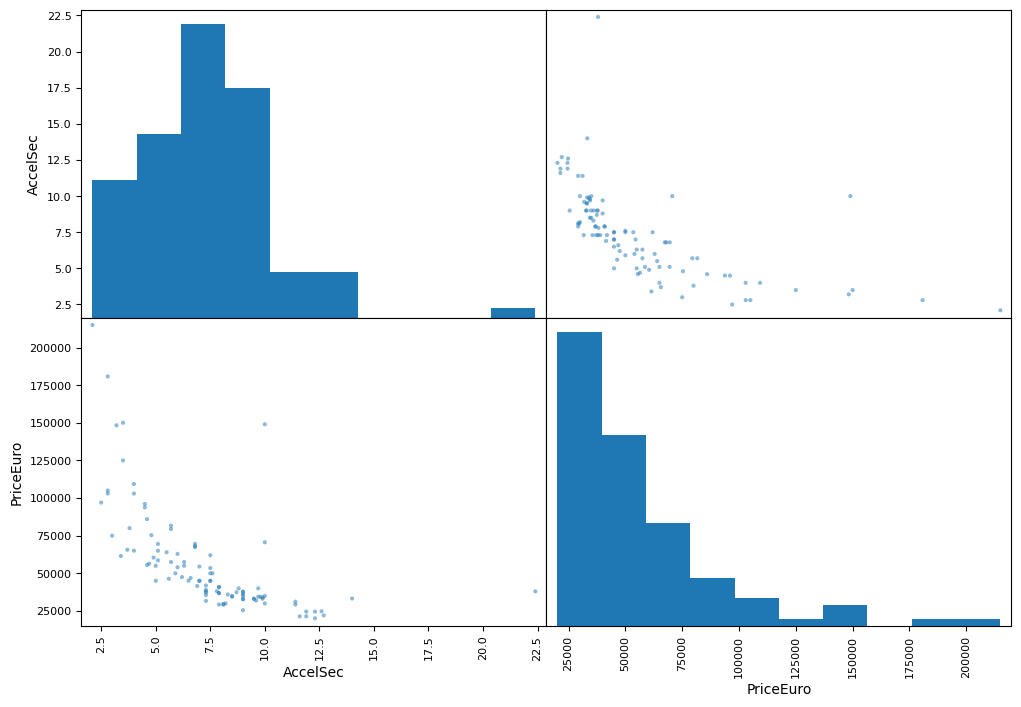

In [458]:
attributes = ["AccelSec","PriceEuro"]
scatter_matrix(df_numeric[attributes], figsize=(12, 8))
plt.show()

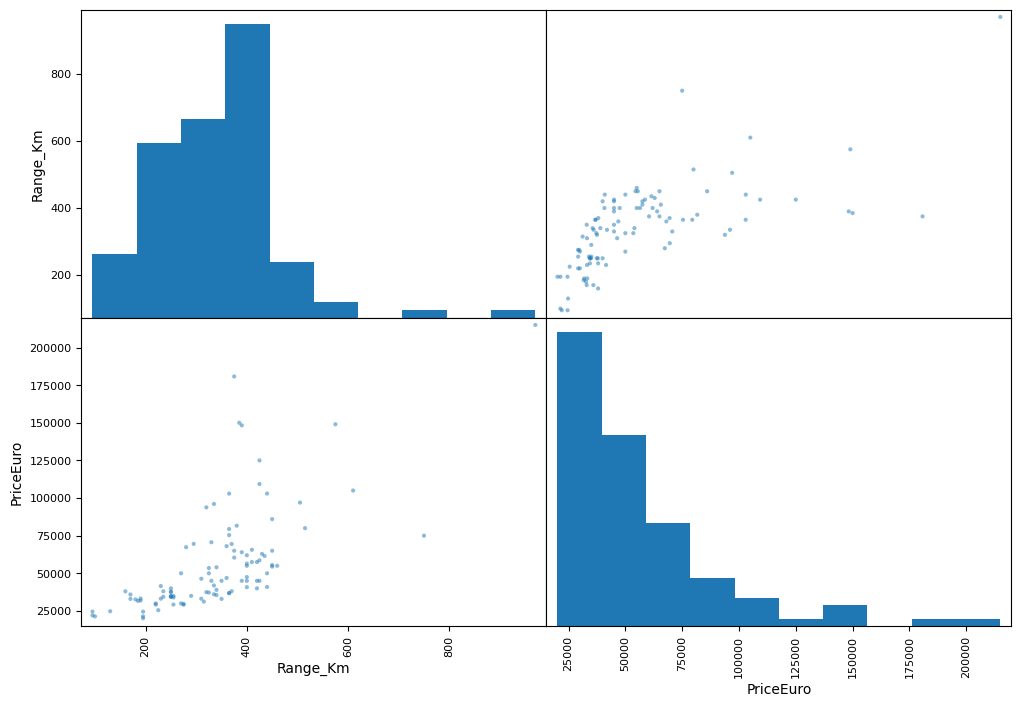

In [459]:
attributes = ["Range_Km","PriceEuro"]
scatter_matrix(df_numeric[attributes], figsize=(12, 8))
plt.show()

In [460]:
df_categorical=df.select_dtypes(include=["category"])
df_categorical

,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Yes,AWD,Type 2 CCS,Sedan,D
1,Yes,RWD,Type 2 CCS,Hatchback,C
2,Yes,AWD,Type 2 CCS,Liftback,D
3,Yes,RWD,Type 2 CCS,SUV,D
4,Yes,RWD,Type 2 CCS,Hatchback,B
...,...,...,...,...,...
98,Yes,FWD,Type 2 CCS,Hatchback,C
99,Yes,AWD,Type 2 CCS,SUV,E
100,Yes,AWD,Type 2 CCS,Hatchback,C
101,Yes,AWD,Type 2 CCS,Hatchback,C


*histgram*

array([[<Axes: title={'center': 'AccelSec'}>,
        <Axes: title={'center': 'TopSpeed_KmH'}>,
        <Axes: title={'center': 'Range_Km'}>],
       [<Axes: title={'center': 'Efficiency_WhKm'}>,
        <Axes: title={'center': 'FastCharge_KmH'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'PriceEuro'}>, <Axes: >, <Axes: >]],
      dtype=object)

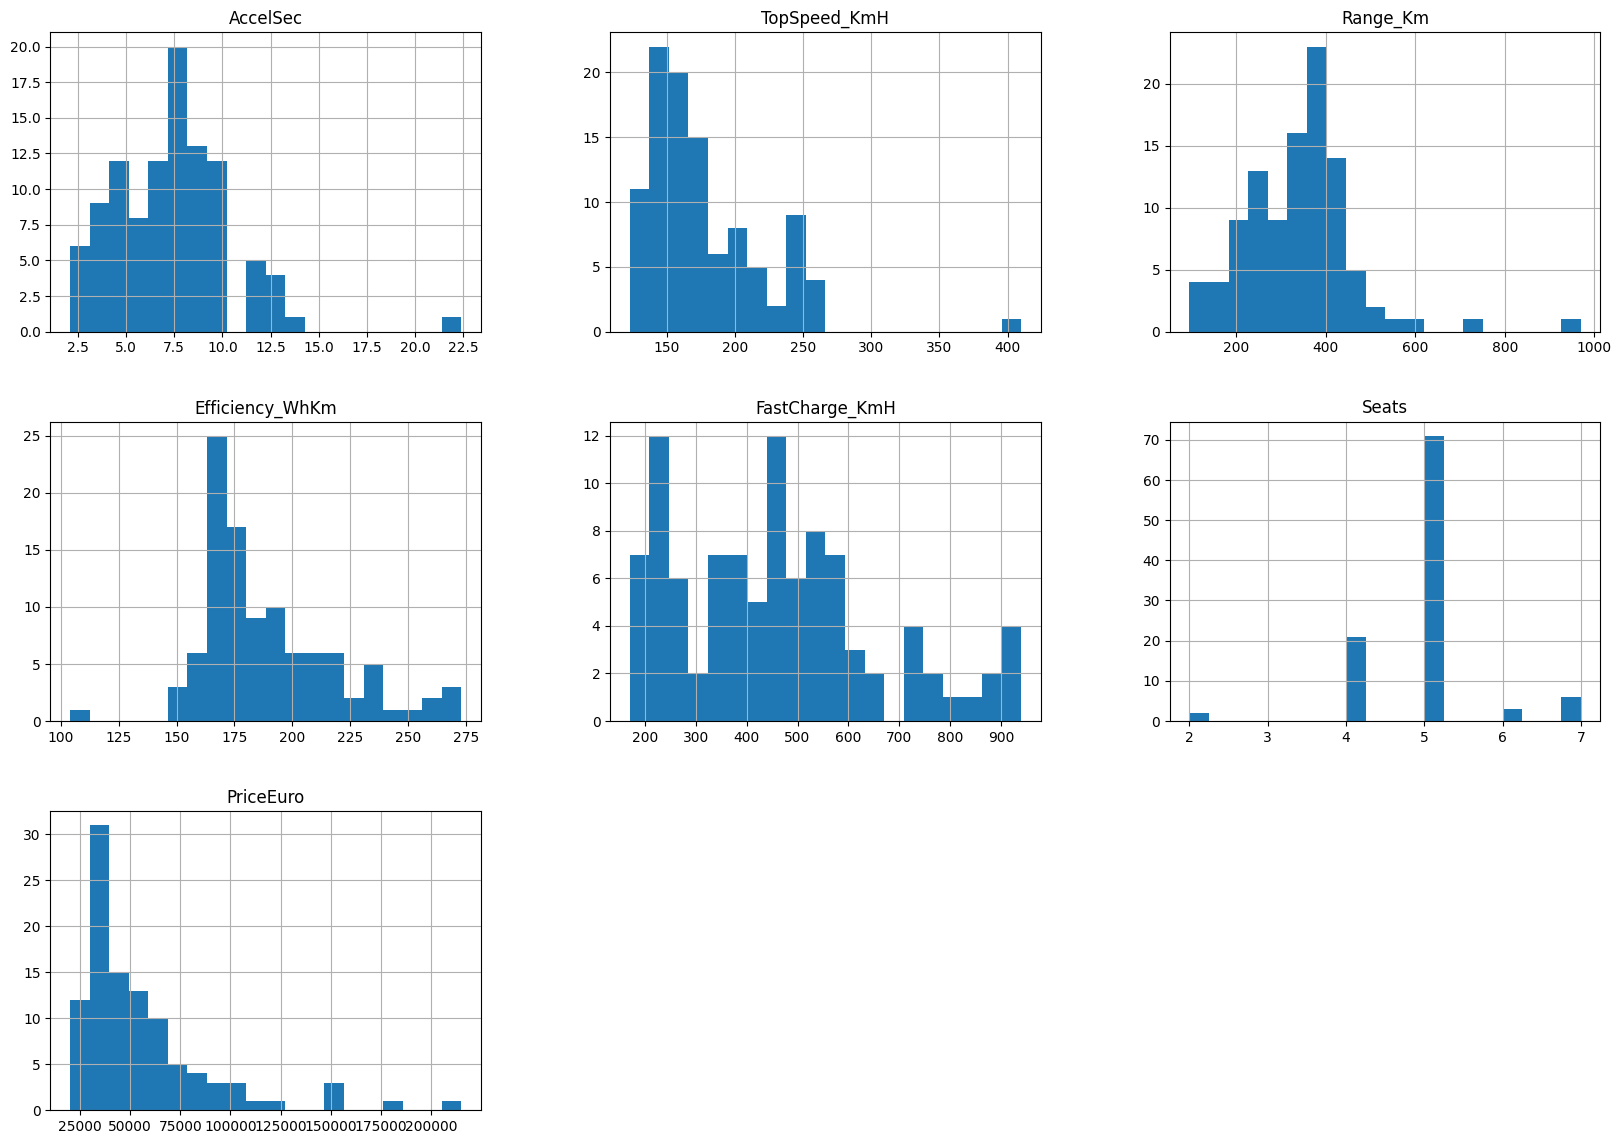

In [461]:
df.hist(bins=20,figsize=(20,14))

*Prepare Data*

In [462]:
df_categorical=df.select_dtypes(include=["category"])
df_numerical=df.select_dtypes(include=[np.number])

In [463]:
df_categorical.head().to_csv("categorical.csv",header=True)
df_categorical


,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment
0,Yes,AWD,Type 2 CCS,Sedan,D
1,Yes,RWD,Type 2 CCS,Hatchback,C
2,Yes,AWD,Type 2 CCS,Liftback,D
3,Yes,RWD,Type 2 CCS,SUV,D
4,Yes,RWD,Type 2 CCS,Hatchback,B
...,...,...,...,...,...
98,Yes,FWD,Type 2 CCS,Hatchback,C
99,Yes,AWD,Type 2 CCS,SUV,E
100,Yes,AWD,Type 2 CCS,Hatchback,C
101,Yes,AWD,Type 2 CCS,Hatchback,C


In [464]:
df_numerical.head().to_csv("numerical.csv",header=True)
df_numerical

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
0,4.6,233,450,161,940.0,5,55480
1,10.0,160,270,167,250.0,5,30000
2,4.7,210,400,181,620.0,5,56440
3,6.8,180,360,206,560.0,5,68040
4,9.5,145,170,168,190.0,4,32997
...,...,...,...,...,...,...,...
98,7.5,160,330,191,440.0,5,45000
99,4.5,210,335,258,540.0,5,96050
100,5.9,200,325,194,440.0,5,50000
101,5.1,200,375,232,450.0,5,65000


In [465]:
features_numerical = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'Seats','PriceEuro']
features_categorical = ['PowerTrain', 'PlugType', 'BodyStyle', 'Segment']
print("Numerical Columns:", df_numerical)
print("Categorical Columns:", df_categorical)
missing_num = [col for col in df_numerical if col not in df.columns]
missing_cat = [col for col in df_categorical if col not in df.columns]



Numerical Columns:      AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH  Seats  \
0         4.6           233       450              161           940.0      5   
1        10.0           160       270              167           250.0      5   
2         4.7           210       400              181           620.0      5   
3         6.8           180       360              206           560.0      5   
4         9.5           145       170              168           190.0      4   
..        ...           ...       ...              ...             ...    ...   
98        7.5           160       330              191           440.0      5   
99        4.5           210       335              258           540.0      5   
100       5.9           200       325              194           440.0      5   
101       5.1           200       375              232           450.0      5   
102       7.5           190       400              238           480.0      5   

     Pri

In [466]:
missing_num

[]

In [467]:
missing_cat

[]

In [468]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy='constant')),
    ("MinMaxScaler",MinMaxScaler())
    #("standard",StandardScaler())
])

categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

total_transformation = ColumnTransformer([
    ("numerical", numerical_features_pipeline, features_numerical),
    ("categorical", categorical_features_pipeline, features_categorical)
], remainder="passthrough")


df_transformed = total_transformation.fit_transform(df)



In [469]:
df_final = pd.DataFrame(df_transformed)
column_names = total_transformation.get_feature_names_out()
df_final.columns = column_names
df_final


,numerical__AccelSec,numerical__TopSpeed_KmH,numerical__Range_Km,numerical__Efficiency_WhKm,numerical__FastCharge_KmH,numerical__Seats,numerical__PriceEuro,categorical__PowerTrain_AWD,categorical__PowerTrain_FWD,categorical__PowerTrain_RWD,...,categorical__Segment_B,categorical__Segment_C,categorical__Segment_D,categorical__Segment_E,categorical__Segment_F,categorical__Segment_N,categorical__Segment_S,remainder__Brand,remainder__Model,remainder__RapidCharge
0,0.123153,0.383275,0.405714,0.337278,1.0,0.6,0.181407,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Tesla,Model 3 Long Range Dual Motor,Yes
1,0.389163,0.12892,0.2,0.372781,0.265957,0.6,0.050654,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Volkswagen,ID.3 Pure,Yes
2,0.128079,0.303136,0.348571,0.455621,0.659574,0.6,0.186334,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Polestar,2,Yes
3,0.231527,0.198606,0.302857,0.60355,0.595745,0.6,0.24586,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,BMW,iX3,Yes
4,0.364532,0.076655,0.085714,0.378698,0.202128,0.4,0.066033,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Honda,e,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.26601,0.12892,0.268571,0.514793,0.468085,0.6,0.127628,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nissan,Ariya 63kWh,Yes
99,0.118227,0.303136,0.274286,0.911243,0.574468,0.6,0.389596,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Audi,e-tron S Sportback 55 quattro,Yes
100,0.187192,0.268293,0.262857,0.532544,0.468085,0.6,0.153286,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nissan,Ariya e-4ORCE 63kWh,Yes
101,0.147783,0.268293,0.32,0.757396,0.478723,0.6,0.23026,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Nissan,Ariya e-4ORCE 87kWh Performance,Yes


In [470]:

numerical_columns = [
    "numerical__AccelSec",
    "numerical__TopSpeed_KmH",
    "numerical__Range_Km",
    "numerical__Efficiency_WhKm",
    "numerical__FastCharge_KmH",
    "numerical__Seats",
    "numerical__PriceEuro"
]

df_final[numerical_columns].head()


,numerical__AccelSec,numerical__TopSpeed_KmH,numerical__Range_Km,numerical__Efficiency_WhKm,numerical__FastCharge_KmH,numerical__Seats,numerical__PriceEuro
0,0.123153,0.383275,0.405714,0.337278,1.0,0.6,0.181407
1,0.389163,0.12892,0.2,0.372781,0.265957,0.6,0.050654
2,0.128079,0.303136,0.348571,0.455621,0.659574,0.6,0.186334
3,0.231527,0.198606,0.302857,0.60355,0.595745,0.6,0.24586
4,0.364532,0.076655,0.085714,0.378698,0.202128,0.4,0.066033


In [471]:
# List of columns to drop (without nested brackets)
columns_to_drop = ["remainder__Brand", "remainder__Model", "remainder__RapidCharge"]

# Drop specified columns from the DataFrame
df_drop = df_final.drop(columns=columns_to_drop)

# Create a correlation matrix
corr_matrix2 = df_drop.corr()

# Get the correlations with the "numerical__PriceEuro" column and sort in descending order
corr_matrix2["numerical__PriceEuro"].sort_values(ascending=False)



numerical__PriceEuro                    1.000000
numerical__TopSpeed_KmH                 0.829057
categorical__Segment_F                  0.682892
numerical__Range_Km                     0.674844
categorical__PowerTrain_AWD             0.670995
numerical__FastCharge_KmH               0.658882
categorical__Segment_S                  0.464017
categorical__BodyStyle_Sedan            0.426250
numerical__Efficiency_WhKm              0.396705
categorical__BodyStyle_Station          0.274549
categorical__BodyStyle_Cabrio           0.187014
categorical__BodyStyle_Liftback         0.183291
categorical__Segment_E                  0.178181
categorical__PlugType_Type 2 CCS        0.068079
categorical__Segment_D                  0.032529
numerical__Seats                        0.020920
categorical__BodyStyle_Pickup           0.012858
categorical__PlugType_Type 2           -0.005640
categorical__Segment_N                 -0.021956
categorical__BodyStyle_MPV             -0.040533
categorical__BodySty

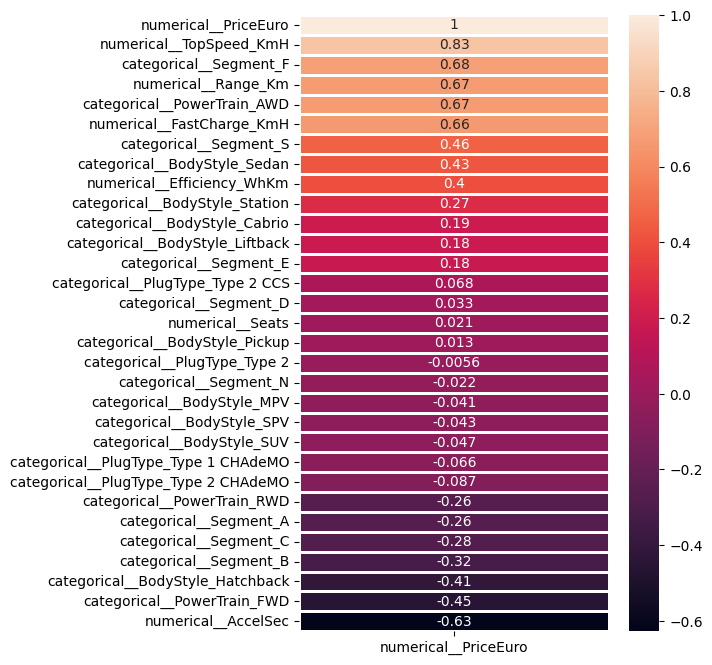

In [472]:
fig, ax = plt.subplots(figsize=(5, 8)) 
corr_with_price = corr_matrix2["numerical__PriceEuro"].sort_values(ascending=False)
corr_with_price_df = corr_with_price.to_frame()
sns.heatmap(corr_with_price_df, ax=ax, linewidths=1, linecolor='white', annot=True)
plt.show()

In [473]:
columns_to_drop = numerical_columns + ["remainder__Brand", "remainder__Model", "remainder__RapidCharge"]
df_final_dropped = df_final.drop(columns=columns_to_drop)
df_final_dropped.head()


,categorical__PowerTrain_AWD,categorical__PowerTrain_FWD,categorical__PowerTrain_RWD,categorical__PlugType_Type 1 CHAdeMO,categorical__PlugType_Type 2,categorical__PlugType_Type 2 CCS,categorical__PlugType_Type 2 CHAdeMO,categorical__BodyStyle_Cabrio,categorical__BodyStyle_Hatchback,categorical__BodyStyle_Liftback,...,categorical__BodyStyle_Sedan,categorical__BodyStyle_Station,categorical__Segment_A,categorical__Segment_B,categorical__Segment_C,categorical__Segment_D,categorical__Segment_E,categorical__Segment_F,categorical__Segment_N,categorical__Segment_S
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


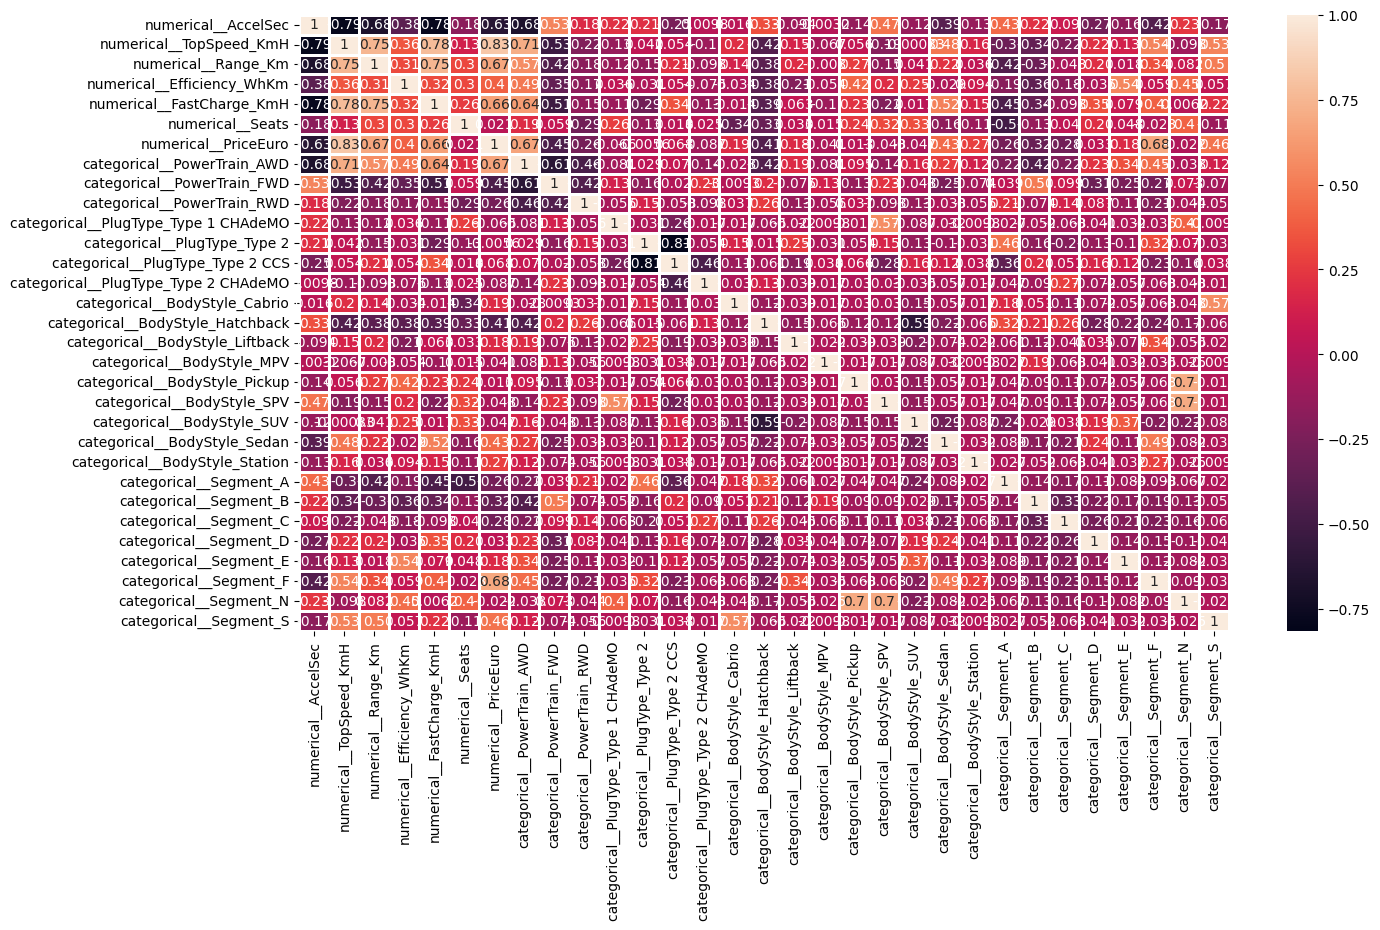

In [474]:
correlation = df_final.drop(["remainder__Brand", "remainder__Model","remainder__RapidCharge"], axis=1)
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(correlation.corr(), ax=ax, linewidths=1, linecolor='white', annot=True)
plt.show()


In [475]:
correlation.corr()

,numerical__AccelSec,numerical__TopSpeed_KmH,numerical__Range_Km,numerical__Efficiency_WhKm,numerical__FastCharge_KmH,numerical__Seats,numerical__PriceEuro,categorical__PowerTrain_AWD,categorical__PowerTrain_FWD,categorical__PowerTrain_RWD,...,categorical__BodyStyle_Sedan,categorical__BodyStyle_Station,categorical__Segment_A,categorical__Segment_B,categorical__Segment_C,categorical__Segment_D,categorical__Segment_E,categorical__Segment_F,categorical__Segment_N,categorical__Segment_S
numerical__AccelSec,1.000000,-0.786195,-0.677062,-0.382904,-0.782324,-0.175335,-0.627174,-0.679296,0.533365,0.178714,...,-0.393803,-0.128473,0.430719,0.219202,0.089784,-0.272622,-0.160106,-0.415748,0.234998,-0.174638
numerical__TopSpeed_KmH,-0.786195,1.000000,0.746662,0.355675,0.778422,0.126470,0.829057,0.707186,-0.525578,-0.219271,...,0.481769,0.161685,-0.301909,-0.343784,-0.220692,0.215241,0.134655,0.537846,-0.097666,0.527045
numerical__Range_Km,-0.677062,0.746662,1.000000,0.313077,0.750859,0.300163,0.674844,0.568565,-0.421194,-0.177815,...,0.221518,0.036489,-0.420363,-0.303817,-0.048325,0.201535,0.017555,0.336531,0.081739,0.498396
numerical__Efficiency_WhKm,-0.382904,0.355675,0.313077,1.000000,0.319678,0.301230,0.396705,0.486185,-0.346020,-0.167882,...,-0.028587,0.093671,-0.187688,-0.362006,-0.179351,-0.035057,0.543141,0.058644,0.445197,0.056653
numerical__FastCharge_KmH,-0.782324,0.778422,0.750859,0.319678,1.000000,0.262732,0.658882,0.637231,-0.511833,-0.154783,...,0.522697,0.151942,-0.446824,-0.337076,-0.098430,0.346464,0.078662,0.395275,0.006186,0.219887
numerical__Seats,-0.175335,0.126470,0.300163,0.301230,0.262732,1.000000,0.020920,0.194762,0.059042,-0.288441,...,-0.158787,-0.110459,-0.496077,-0.132715,0.040342,0.199753,0.048239,-0.023001,0.402968,-0.110459
numerical__PriceEuro,-0.627174,0.829057,0.674844,0.396705,0.658882,0.020920,1.000000,0.670995,-0.450019,-0.262507,...,0.426250,0.274549,-0.263268,-0.322378,-0.275769,0.032529,0.178181,0.682892,-0.021956,0.464017
categorical__PowerTrain_AWD,-0.679296,0.707186,0.568565,0.486185,0.637231,0.194762,0.670995,1.000000,-0.608871,-0.460382,...,0.269260,0.121760,-0.219588,-0.423804,-0.215729,0.226555,0.336249,0.446554,-0.032886,0.121760
categorical__PowerTrain_FWD,0.533365,-0.525578,-0.421194,-0.346020,-0.511833,0.059042,-0.450019,-0.608871,1.000000,-0.423888,...,-0.245520,-0.074136,0.039031,0.498548,0.099024,-0.309124,-0.245520,-0.271893,0.072977,-0.074136
categorical__PowerTrain_RWD,0.178714,-0.219271,-0.177815,-0.167882,-0.154783,-0.288441,-0.262507,-0.460382,-0.423888,1.000000,...,-0.032673,-0.056056,0.207036,-0.074030,0.135494,0.087262,-0.109159,-0.205586,-0.044118,-0.056056


*Visualization*



In [476]:
px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',labels = {'x':'Car Brands','y':'Top Speed Km/H'})

In [477]:
px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',labels = {'x':'Accelaration','y':'Car Brands'})

<Axes: xlabel='No. of Samples', ylabel='Car Price'>

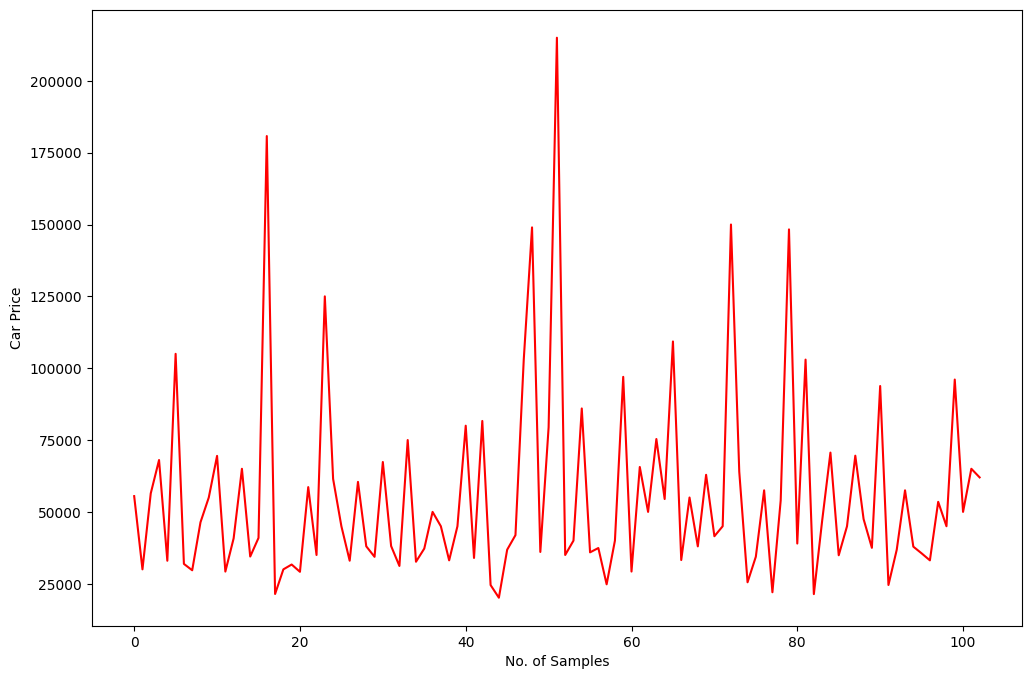

In [478]:
df['PriceEuro'].plot(figsize = (12,8),xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

In [479]:
px.pie(df,names = 'Brand',values = 'PriceEuro')

*Train Set and Test Set*

In [480]:
[train_data,test_data]=train_test_split(df_final,test_size=0.2,random_state=42)

In [481]:
train_data.shape

(82, 34)

In [482]:
test_data.shape

(21, 34)

In [483]:
features=df_final.drop(["numerical__PriceEuro","remainder__Brand","remainder__Model","remainder__RapidCharge"],axis=1)
target=df_final["numerical__PriceEuro"]
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=42)

*Linear Regression*

In [484]:
linear_model =LinearRegression()
start_time = time.time()
linear_model.fit(features_train,target_train)
end_time = time.time()
training_time = end_time - start_time

In [485]:
test_predictions = linear_model.predict(features_test)
mse = mean_squared_error(target_test, test_predictions)
r_squared = r2_score(target_test, test_predictions)

print("Training Time:", training_time, "seconds")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)
print("coefficent:",linear_model.coef_)
print("intercept:",linear_model.intercept_)

Training Time: 0.00299835205078125 seconds
Mean Squared Error (MSE): 0.0053824753538193725
R-squared (R²): 0.7422594962656839
coefficent: [ 0.01178879 -0.23626539 -0.13044059  0.21366477  0.11887908 -0.0304798
  0.04459329 -0.04565654  0.00106325 -0.08443823 -0.05165186  0.0470991
  0.08899098 -0.00729919 -0.02747135  0.05440964  0.04362444 -0.16462336
  0.01896608 -0.01813357  0.02143946  0.07908785 -0.22497647 -0.19026497
 -0.19837107 -0.14608204 -0.12557139  0.19815365 -0.14565728  0.83276957]
intercept: 0.216427959670008


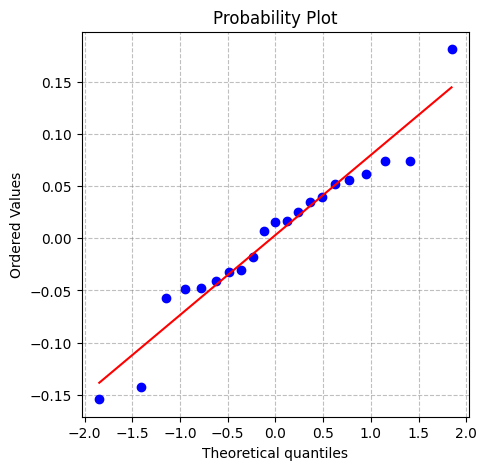

In [486]:
test_res = pd.to_numeric(target_test - test_predictions, errors='coerce')

fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()

### *Batch Gradient Descent*

In [487]:
train_features = np.array(features_train, dtype=np.float64)
train_target = np.array(target_train, dtype=np.float64)

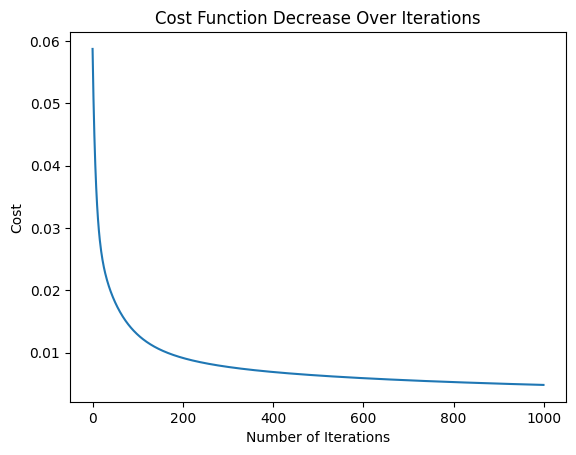

Training Time: 0.00299835205078125 seconds
Mean Squared Error: 0.005958274036966519
R-squared: 0.7146873044973383
Predicted values: [0.26326633105058855 0.33737933883630833 0.11157782425033749
 0.5412102908512701 0.2938919769239194 0.4816277693743699
 0.2977353861080377 0.09482381804193726 0.19822562217016182
 0.323135313829656 0.06612180071455662 0.08050647750820406
 0.17854665898628028 0.07129810069294867 0.20185870183375154
 0.06198656684549919 0.5635674974546537 0.3837251576641858
 0.09723078335192917 0.10062498852885698 0.20465740825557435]


In [488]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    return (1 / ( m)) * np.sum((hypothesis(X, theta) - y) ** 2)

def batch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = hypothesis(X, theta)
        theta -= (2/m) * learning_rate * np.dot(X.T, (prediction - y))
        cost_history[it] = cost_function(X, y, theta)

    return theta, cost_history

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
    residual_variance = np.sum((y_true - y_pred) ** 2)
    return 1 - (residual_variance / total_variance)




X_train = np.c_[np.ones(len(train_features)),train_features]
theta = np.zeros(X_train.shape[1])

learning_rate = 0.01
iterations = 1000
start_time=time.time()
theta, cost_history = batch_gradient_descent(X_train, train_target, theta, learning_rate, iterations)
end_time=time.time()
train_time=end_time-start_time

plt.plot(cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Decrease Over Iterations')
plt.show()


y_pred = hypothesis(np.c_[np.ones(len(features_test)), features_test], theta)
mse = mean_squared_error(target_test, y_pred)
r2 = r_squared(target_test, y_pred)
print("Training Time:", training_time, "seconds")
print("Mean Squared Error:", mse)
print("R-squared:", r2)

X_test = np.c_[np.ones(len(features_test)),features_test]
y_pred = hypothesis(X_test, theta)
print("Predicted values:", y_pred)

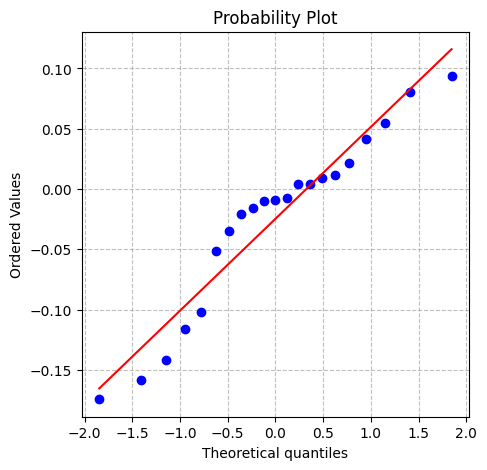

In [489]:
test_res = pd.to_numeric(target_test - y_pred, errors='coerce')

fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()

### *Stochastic Gradient Descent*

In [490]:
sgd=SGDRegressor(max_iter=1000,tol=0.001,early_stopping=True,n_iter_no_change=10,penalty=None)

In [491]:
start_time = time.time()
sgd.fit(train_features, train_target)
end_time = time.time()
training_time = end_time - start_time
test_predictions = sgd.predict(features_test)
mse = mean_squared_error(target_test, test_predictions)
r_squared = r2_score(target_test, test_predictions)

print("Training Time:", training_time, "seconds")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)

print("coefficent:", sgd.coef_)
print("intercept:",sgd.intercept_)


Training Time: 0.011723518371582031 seconds
Mean Squared Error (MSE): 0.0064425882280624526
R-squared (R²): 0.6914958590427545
coefficent: [-9.76137426e-03  5.04465509e-02  4.59386337e-02  4.07696423e-02
  6.45412285e-02  2.46107218e-02  9.37925346e-02 -2.86102082e-02
 -1.25834552e-02 -6.94502931e-04  8.43647070e-03  4.16617551e-02
  3.19514833e-03  2.23305605e-02 -2.61740260e-02  1.52914505e-02
 -7.37086267e-05 -1.75847069e-03  2.98716601e-03 -9.58589353e-03
  3.46655495e-02  1.49162435e-02 -1.34497331e-02 -1.86959661e-02
 -2.36870406e-02 -2.56089448e-03  7.45322339e-03  7.72133319e-02
  1.22869532e-03  2.50972548e-02]
intercept: [0.05259887]


C:\Users\error\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but SGDRegressor was fitted without feature names



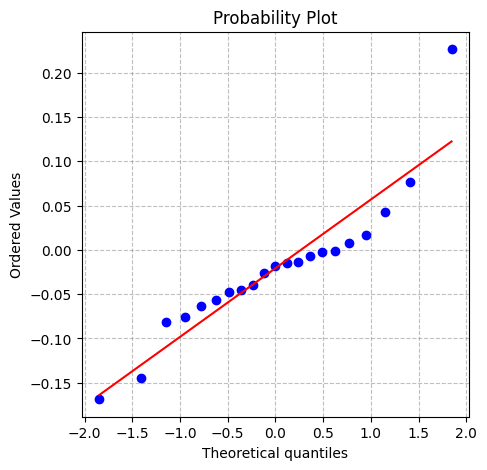

In [492]:
test_res = pd.to_numeric(target_test - test_predictions, errors='coerce')
fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()

*Polynomial Regression*

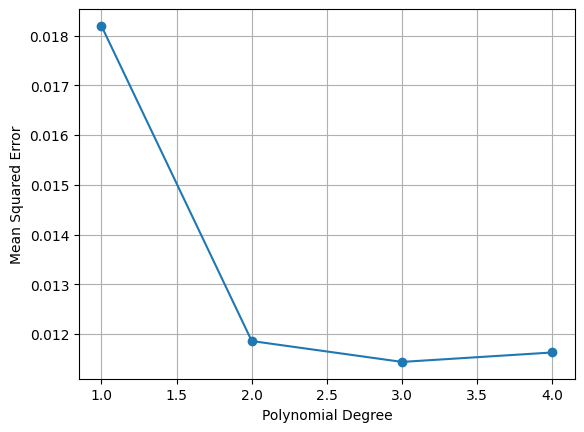

Best polynomial degree: 3
Test MSE: 0.005006695797010299
Test R-squared: 0.760253747218696


C:\Users\error\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but PolynomialFeatures was fitted without feature names



In [493]:
degrees = np.arange(1,5)
mean_mse = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(train_features)
    model = SGDRegressor()
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X_poly, train_target, cv=kf, scoring='neg_mean_squared_error')
    mean_mse.append(np.mean(mse_scores))

best_degree_index = np.argmin(mean_mse)
best_degree = degrees[best_degree_index]

plt.figure()
plt.plot(degrees, mean_mse, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

print(f'Best polynomial degree: {best_degree}')

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(train_features)

model = SGDRegressor()
model.fit(X_poly, train_target)

y_test_pred = model.predict(poly.transform(features_test))
mse_test = mean_squared_error(target_test, y_test_pred)
r2_test = r2_score(target_test, y_test_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R-squared: {r2_test}')


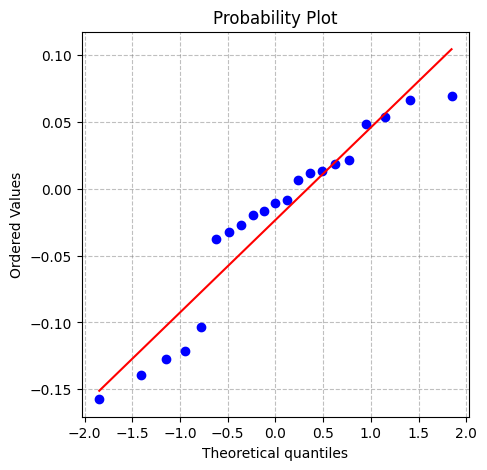

In [494]:
test_res = pd.to_numeric(target_test - y_test_pred, errors='coerce')
fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()

*Ridge and Lasso*

In [495]:
train_features.shape
alphas = [0.001,0.01,0.1,1,10, 100]

### *Ridge*

In [496]:
ridge_params = {'alpha': alphas}
poly_over_features = PolynomialFeatures(degree=4, include_bias=False)
feature_overfit = poly_over_features.fit_transform(train_features)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = -cross_val_score(Ridge(), feature_overfit, train_target, cv=kf, scoring='neg_mean_squared_error')
best_cv_score_index = np.argmin(cv_results)
best_ridge_alpha = alphas[best_cv_score_index]

sgd_ridge = SGDRegressor(alpha=best_ridge_alpha, max_iter=1000, tol=0.001, early_stopping=True,
                         n_iter_no_change=10, penalty='l2')

sgd_ridge.fit(feature_overfit, train_target)
test_feature_overfit = poly_over_features.transform(features_test)
test_predictions_ridge = sgd_ridge.predict(test_feature_overfit)
test_mse_ridge = mean_squared_error(target_test, test_predictions_ridge)
test_r2_ridge = r2_score(target_test, test_predictions_ridge)

print("Ridge Regression:")
print("Best Penalty Coefficient:", best_ridge_alpha)
print("Test MSE:", test_mse_ridge)
print("Test R-squared:", test_r2_ridge)



Ridge Regression:
Best Penalty Coefficient: 0.01
Test MSE: 0.0024778841700943102
Test R-squared: 0.8813462074206782


C:\Users\error\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but PolynomialFeatures was fitted without feature names



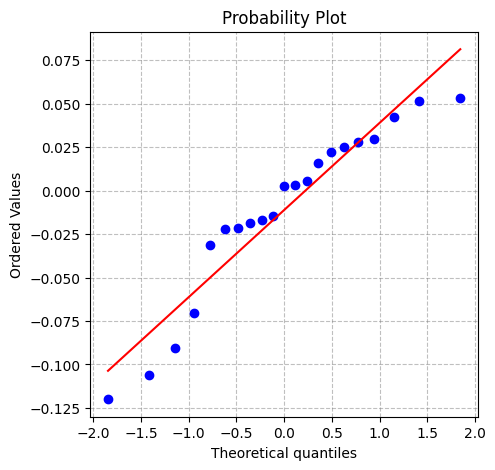

In [497]:
test_res = pd.to_numeric(target_test -test_predictions_ridge, errors='coerce')
fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()

### *Lasso*

In [498]:
Lasso_params = {'alpha': alphas}
poly_over_features = PolynomialFeatures(degree=4, include_bias=False)
feature_overfit = poly_over_features.fit_transform(train_features)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = -cross_val_score(Lasso(), feature_overfit, train_target, cv=kf, scoring='neg_mean_squared_error')
best_cv_score_index = np.argmin(cv_results)
best_lasso_alpha = alphas[best_cv_score_index]

sgd_lasso = SGDRegressor(alpha=best_lasso_alpha, max_iter=1000, tol=0.001, early_stopping=True,
                         n_iter_no_change=10, penalty='l1')

sgd_lasso.fit(feature_overfit, train_target)
test_feature_overfit = poly_over_features.transform(features_test)
test_predictions_lasso = sgd_lasso.predict(test_feature_overfit)
test_mse_lasso = mean_squared_error(target_test, test_predictions_lasso)
test_r2_lasso = -r2_score(target_test, test_predictions_lasso)

print("Lasso Regression:")
print("Best Penalty Coefficient:", best_lasso_alpha)
print("Test MSE:", test_mse_lasso)
print("Test R-squared:", test_r2_lasso)

Lasso Regression:
Best Penalty Coefficient: 0.01
Test MSE: 0.004974229078301633
Test R-squared: -0.7618084200939993


C:\Users\error\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but PolynomialFeatures was fitted without feature names



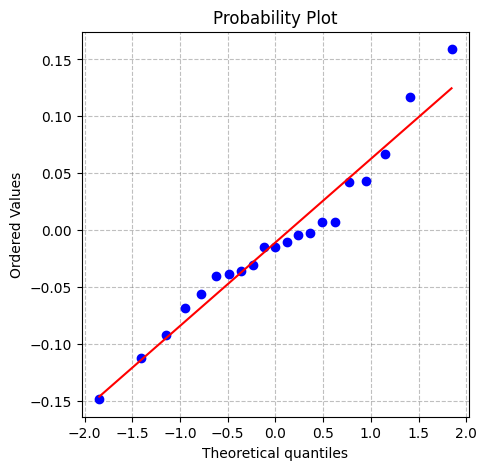

In [499]:
test_res = pd.to_numeric(target_test -test_predictions_lasso, errors='coerce')
fig, ax = plt.subplots(figsize=(5,5))
sp.stats.probplot(test_res, plot=ax)
plt.grid(which='both', linestyle='--', color='gray', alpha=0.5) 
plt.show()